In [1]:
# Install our dependencies

In [7]:
pip install sqlalchemy psycopg2 pandas seaborn ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
DB_USER = 'postgres'
DB_PASSWORD = os.getenv('POSTGRES_PASSWORD')
DB_HOST = os.getenv('DATABASE_HOST')  # Docker Compose service name
DB_PORT = '5432'
DB_NAME = 'postgres'

Loading Titanic dataset...
Dataset loaded with 891 rows and 15 columns.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Connecting to PostgreSQL...
Writing Titanic dataset to the PostgreSQL database...
Data successfully loaded into the 'titanic' table.
Querying data from PostgreSQL...
Query results:


,pclass,survived,avg_age,avg_fare
0,1,1,35.368197,95.608029
1,3,0,26.555556,13.669364
2,3,1,20.646118,13.694887
3,1,0,43.695312,64.684008
4,2,0,33.544444,19.412328
5,2,1,25.901566,22.055700


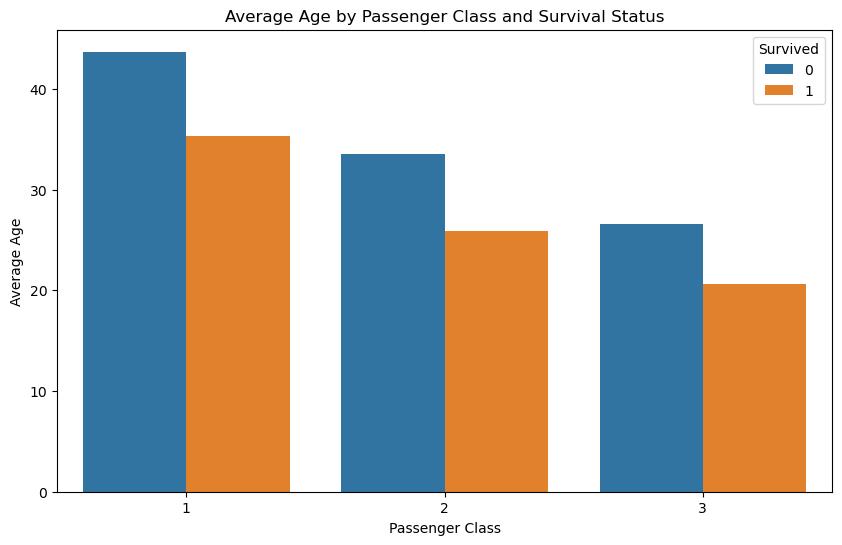

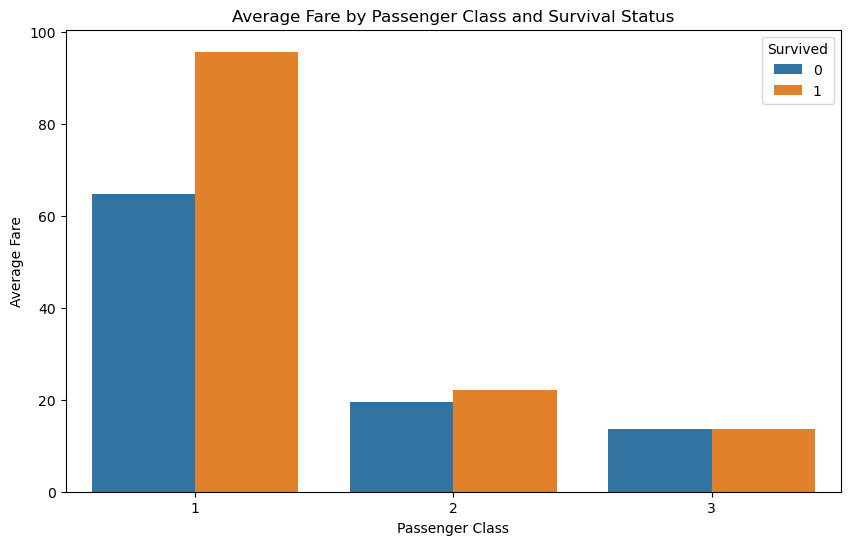

In [4]:
# Required imports
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine

# Step 1: Load a public dataset
print("Loading Titanic dataset...")
titanic = sns.load_dataset('titanic')
print(f"Dataset loaded with {titanic.shape[0]} rows and {titanic.shape[1]} columns.")

# Display the first few rows of the dataset
display(titanic.head())

# Step 2: Connect to PostgreSQL
print("Connecting to PostgreSQL...")

connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
engine = create_engine(connection_string)

# Step 3: Load the dataset into the database
print("Writing Titanic dataset to the PostgreSQL database...")
titanic.to_sql('titanic', engine, if_exists='replace', index=False)

print("Data successfully loaded into the 'titanic' table.")

# Step 4: Query the data from PostgreSQL
print("Querying data from PostgreSQL...")
query = "SELECT pclass, survived, AVG(age) as avg_age, AVG(fare) as avg_fare FROM titanic GROUP BY pclass, survived;"
results = pd.read_sql(query, engine)

# Display the query results
print("Query results:")
display(results)

# Step 5: Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot showing average fare and age by class and survival
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='pclass', y='avg_age', hue='survived')
plt.title("Average Age by Passenger Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Average Age")
plt.legend(title="Survived", loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='pclass', y='avg_fare', hue='survived')
plt.title("Average Fare by Passenger Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.legend(title="Survived", loc='upper right')
plt.show()

In [9]:
# Step 6: Print the entire Titanic table from PostgreSQL
import ipywidgets as widgets

print("Fetching all rows from the 'titanic' table...")
query_all = "SELECT * FROM titanic;"
full_table = pd.read_sql(query_all, engine)

# Display the entire table
print(f"Full Titanic table ({full_table.shape[0]} rows, {full_table.shape[1]} columns):")

output = widgets.Output()

with output:
    display(full_table)

display(output)


Fetching all rows from the 'titanic' table...
Full Titanic table (891 rows, 15 columns):


Output()